# Module 2 Assignment 1: House Prices: Advanced Regression Techniques EDA (Kaggle)

**Reed Ballesteros**

**MSDS-422**

**4/10/2022**

**Instructor: Prof. Noah Gift**

## Background
Compete in the House Prices:  Advanced Regression Techniques (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition, where you will predict house prices in Ames, Iowa (‘SalePrice’).  You will be required to submit predictions to Kaggle.com and provide evidence of those submissions. As part of the analysis, you must address the following at a minimum. 

## Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  

## Requirements
- Conduct your analysis using a cross-validation design.
- Conduct EDA and provide appropriate visualizations in the process.
- Build a minimum of two separate regression models using the training set.
- Evaluate polynomial, indicator, dichotomous, & piecewise model components.
- Create at least one feature from the data set.
- Evaluate the models’ assumptions.
- Evaluate goodness of fit metrics on the training and validation sets.
- Submit predictions for the unseen test set available on Kaggle.com.
- Provide your Kaggle user name and a screen snapshot of your Kaggle scores.
- Discuss what your models tell you in layman’s terms.

### Libraries to be loaded:

In [592]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm


## INGEST

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [297]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_df.shape

(1460, 81)

In [5]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test_df.shape

(1459, 80)

In [8]:
qual_cols = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
qual_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
quant_cols = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quant_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## EDA

- **Conduct EDA and provide appropriate visualizations in the process.**

**(Note: most of EDA has been imported from last week's Module 1 Assignment 1 work.)**

**The dependent variable is SalePrice, as the column exists in the training data but not in the test data.**

**There are 1460 entires in the training data and 1459 entires in the test data.**

In [659]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [660]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [661]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Distribution of SalePrice:**

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

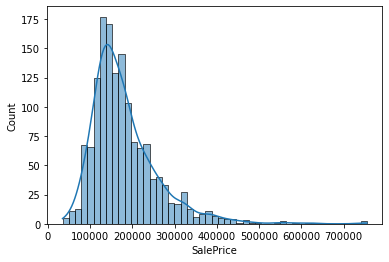

In [662]:
sns.histplot(data=train_df, kde=True, x='SalePrice')


In [663]:
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**The median SalePrice is \\$163000 while the mean is \\$180921.20.**

**Performing a logarithmic transformation of Sale Price looks to have a more normal distribution.**

In [703]:
salePriceLog = np.log(train_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

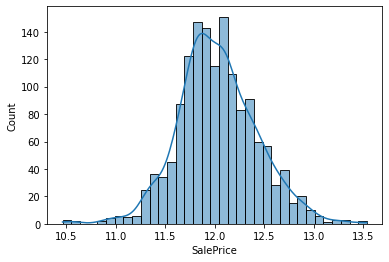

In [705]:
sns.histplot(kde=True, x=salePriceLog)

In [706]:
salePriceLog.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

**Joint Plots of SalePrice in respect to other features like OverallCond and GrLivingArea:**

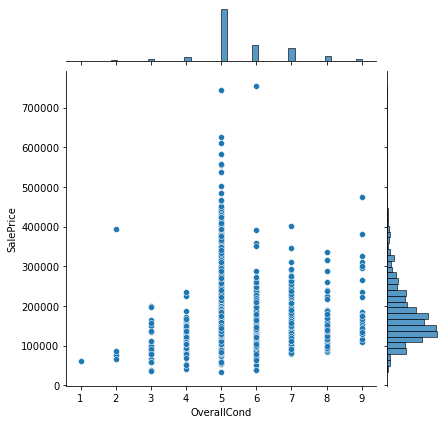

In [664]:
sns.jointplot(x="OverallCond", 
              y="SalePrice",
             edgecolor="white",
             data=train_df);

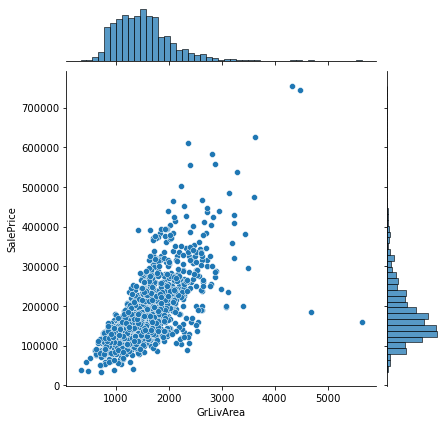

In [665]:
sns.jointplot(x="GrLivArea", 
              y="SalePrice",
             edgecolor="white",
             data=train_df);

**Qualitative/categorial data:**

In [666]:
 # get a list of qualitative columns in the training set, where colume type = 'object'
qual_cols = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
qual_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

**Quantitative/numerical data:**

In [667]:
 # get a list of quantitative columns in the training set, where colume type = 'object'
quant_cols = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quant_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [668]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [669]:
num_na_features = train_df.isna().sum()
num_na_features = num_na_features[num_na_features > 0]
num_na_features.sort_values(inplace=True)
num_na_features.describe()

count      19.000000
mean      366.578947
std       546.815764
min         1.000000
25%        37.000000
50%        81.000000
75%       474.500000
max      1453.000000
dtype: float64

In [670]:
num_na_features.size

19

**Let's graph a bar chart of null values.**

<AxesSubplot:>

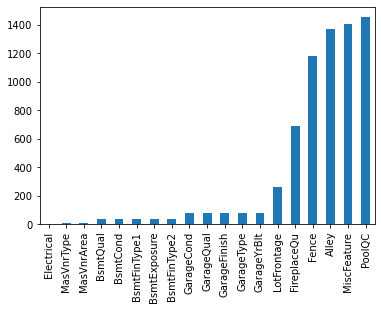

In [671]:
num_na_features.plot.bar()

**There are 19 features that contain null values.**

**Most listings/rows do not contain 'FireplaceQC','PoolQC', 'Alley', 'Fence', 'MiscFeature', features. We'll concentrate on these particular features.**

**Almost half of the homes do not list 'FireplaceQC' (690) because they do not have a fireplace.**

In [672]:
train_df[train_df['Fireplaces'] == 0].FireplaceQu.isnull().sum()


690

In [673]:
train_df[train_df['Fireplaces'] != 0].FireplaceQu.isnull().sum()

0

**All but 7 of the 1460 listings/rows do not have 'PoolQc' since 'PoolArea' = 0 (most likely indicates there is no pool in these homes).**

In [674]:
len(train_df[train_df['PoolArea'] == 0])

1453

**Though data_description.txt lists 'Alley' value 'NA' to indicate 'no alley access' for a listing/home, the data most likely just uses a null value instead.**

In [675]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [676]:
train_df['Alley'].isnull().sum()

1369

**We might assume 'Fence' might be done in the same fashion.**

In [677]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [678]:
train_df['Fence'].isnull().sum()

1179

**We might also assume 'MiscFeature' is done the same way as well.**

In [679]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [680]:
train_df['MiscFeature'].isnull().sum()

1406

**Homes that have null basement features is due to that they do not have basements (TotalBsmtSF = 0).**

In [681]:
len(train_df[train_df['TotalBsmtSF'] == 0] )


37

**Homes that have null garage features is due to that they do not have garages (GarageArea = 0).**

In [682]:
len(train_df[train_df['GarageArea'] == 0])


81

In [683]:
null_mason = train_df[train_df['MasVnrType'].isna()]
null_mason['MasVnrArea']


234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

**Let's look at outliers bewteen Living Area (GrLivingArea) and the dependent variable (SalePrice).**

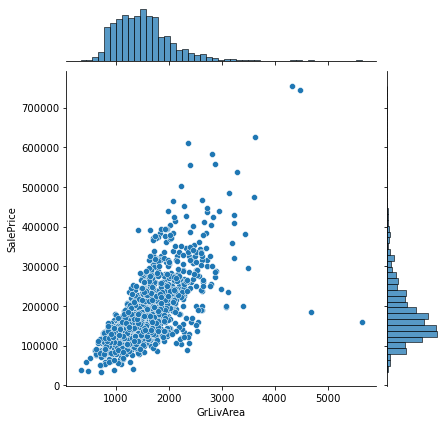

In [684]:
sns.jointplot(x="GrLivArea", 
              y="SalePrice",
             edgecolor="white",
             data=train_df);

**GrLivingArea seems to correlate well with SalePrice, including most outliers, with the exception of two larger homes with a Sale Price seem to be just over the median or average.**

**Let's look at category outliers in respect to the dependent variable (SalePrice).**

In [685]:
 # get a list of qualitative columns in the training set, where colume type = 'object'
qual_cols = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

qual_cols.append('SalePrice') # add the quantitative dependent varialble (SalePrice) to the list
train_qual_df = train_df[qualitative] # get a dataframe of qualitative columns mapped to dependent variable (SalePrice)
train_qual_df = train_qual_df.fillna('NONE') # fill any null cells in the dataframe with NONE
qual_cols.pop() # remove Sale Price from the list of qualitative columns

**Create a boxplot of each qualitative feature relative to the dependent varialble (SalePrice).**

MSZoning


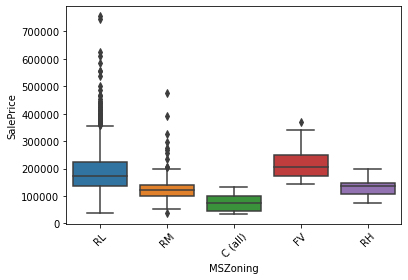

Street


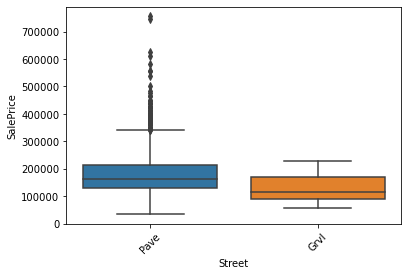

Alley


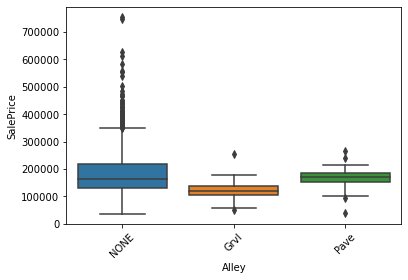

LotShape


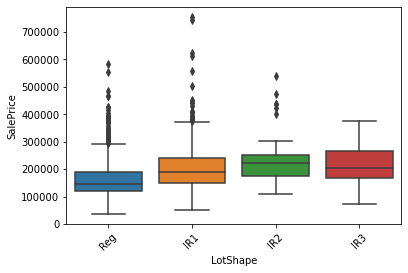

LandContour


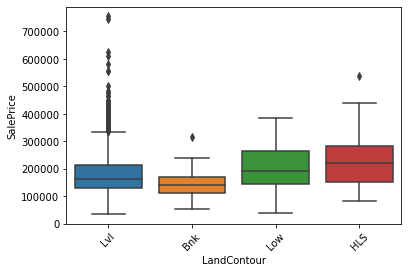

Utilities


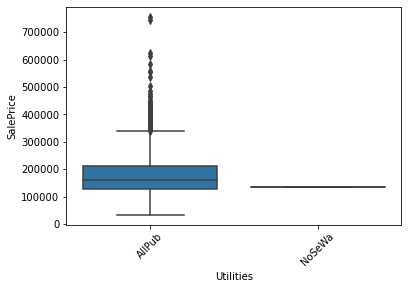

LotConfig


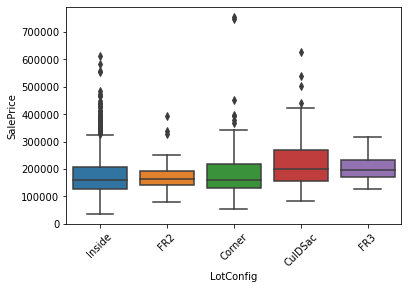

LandSlope


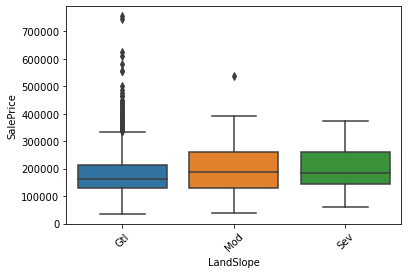

Neighborhood


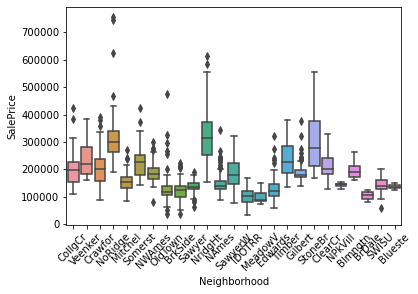

Condition1


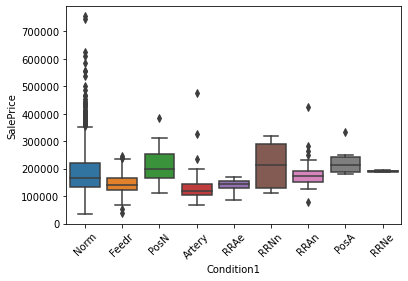

Condition2


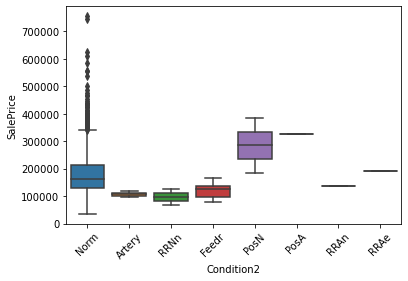

BldgType


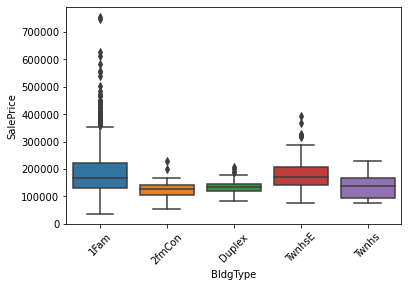

HouseStyle


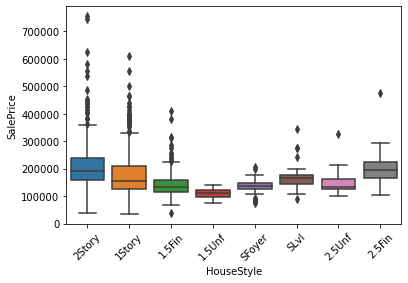

RoofStyle


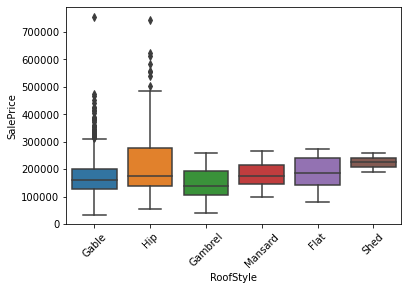

RoofMatl


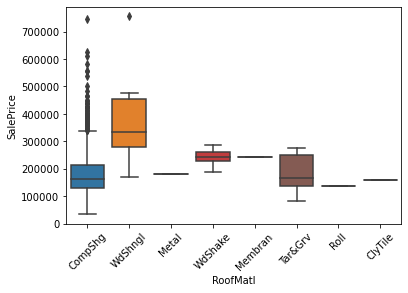

Exterior1st


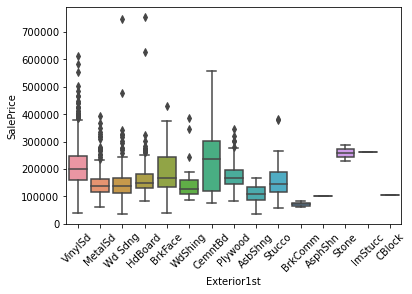

Exterior2nd


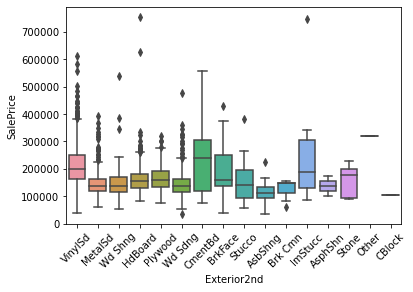

MasVnrType


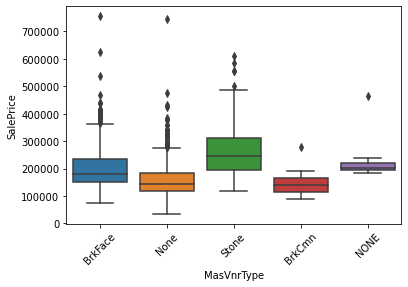

ExterQual


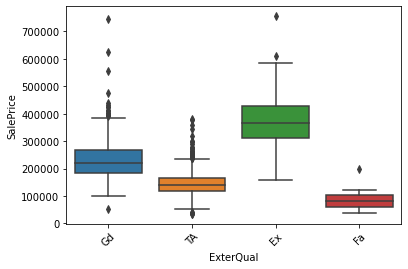

ExterCond


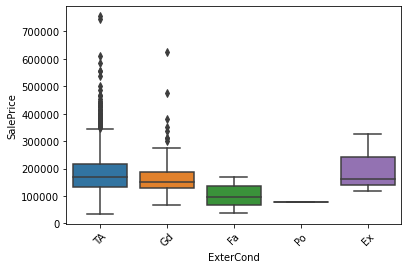

Foundation


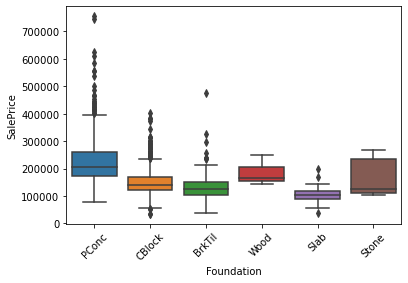

BsmtQual


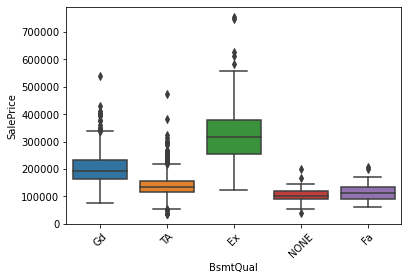

BsmtCond


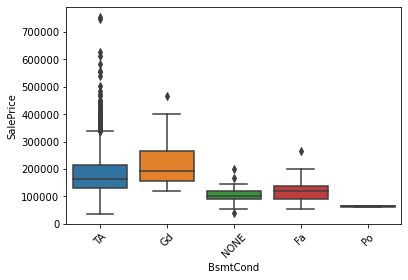

BsmtExposure


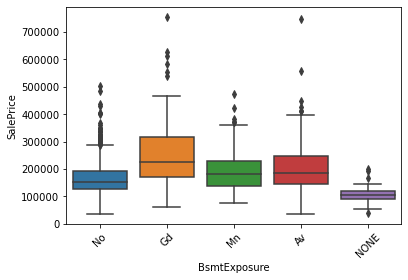

BsmtFinType1


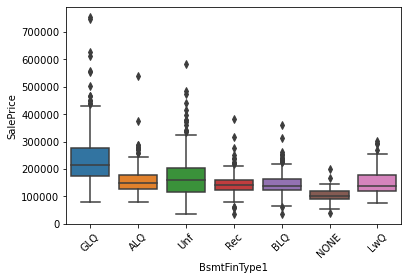

BsmtFinType2


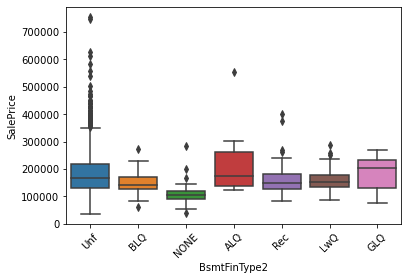

Heating


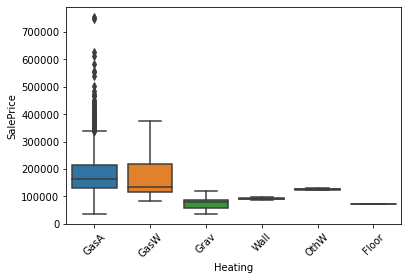

HeatingQC


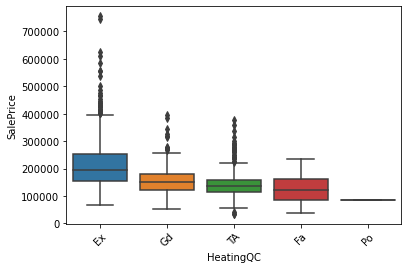

CentralAir


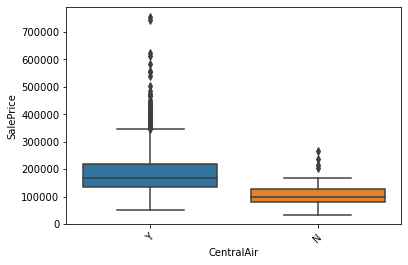

Electrical


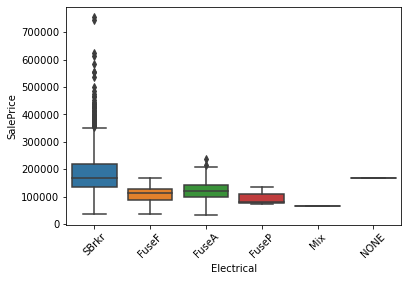

KitchenQual


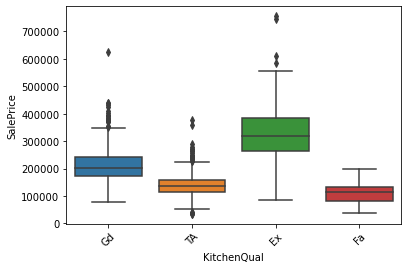

Functional


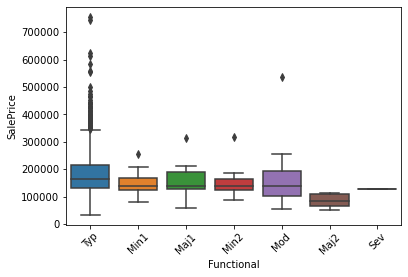

FireplaceQu


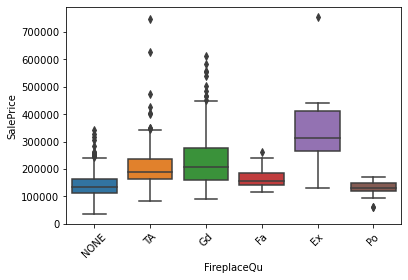

GarageType


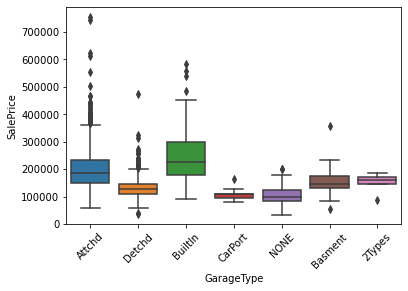

GarageFinish


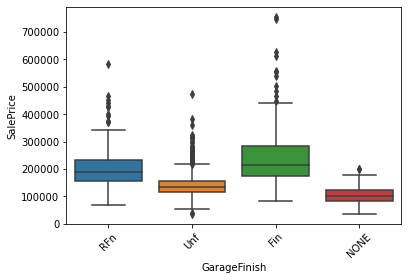

GarageQual


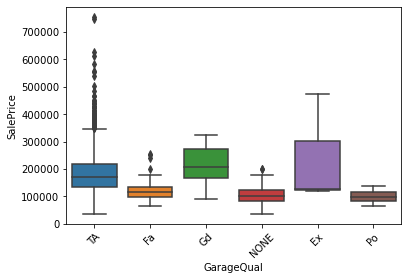

GarageCond


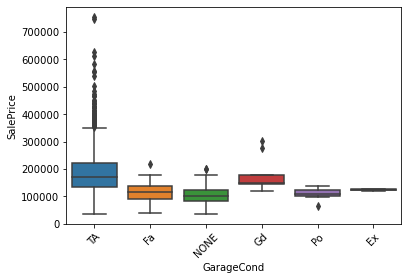

PavedDrive


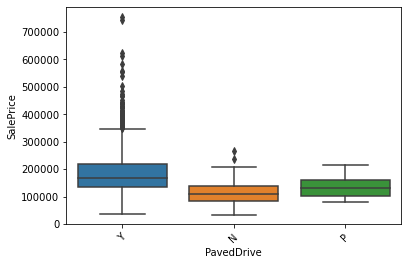

PoolQC


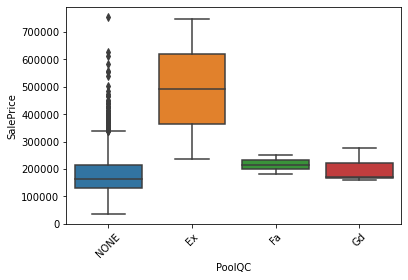

Fence


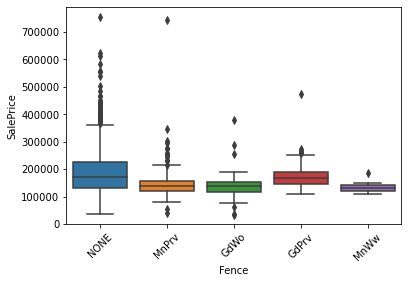

MiscFeature


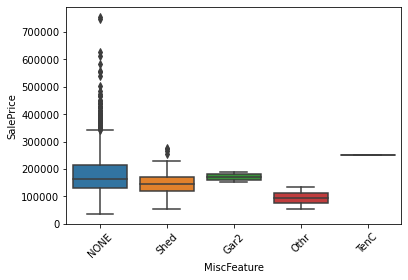

SaleType


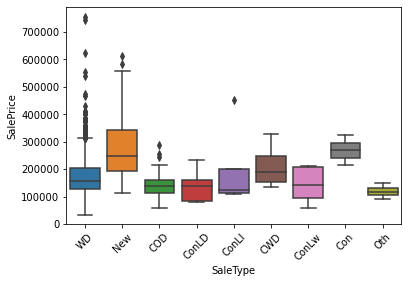

SaleCondition


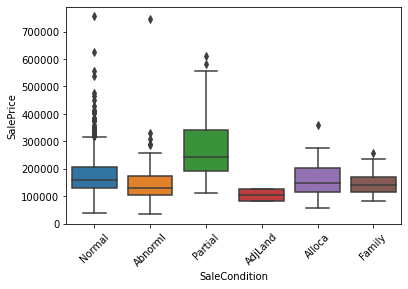

In [686]:
# create a boxplot of each qualitative feature relative to the dependent varialble (SalePrice)
for c in train_qual_df:
    if (c != 'SalePrice'):
        print(c)
        ax = sns.boxplot(data=train_qual_df, x=c, y='SalePrice')
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
        plt.show(ax)

**In regards to outliers, let us look at SaleType in regards to SalePrice.**

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

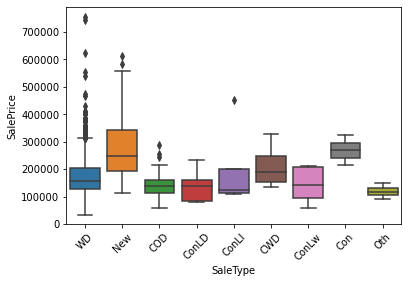

In [687]:

ax = sns.boxplot(data=train_qual_df, x='SaleType', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax


In [688]:
train_df.groupby('SaleType').SalePrice.describe()


,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,43.0,143973.255814,47098.294314,60000.0,112000.00,139000.0,160500.00,287000.0
CWD,4.0,210600.000000,86421.486526,136000.0,152500.00,188750.0,246850.00,328900.0
Con,2.0,269600.000000,76933.217793,215200.0,242400.00,269600.0,296800.00,324000.0
ConLD,9.0,138780.888889,53876.560647,79900.0,85000.00,140000.0,160000.00,235128.0
ConLI,5.0,200390.000000,145282.519595,110000.0,115000.00,125000.0,200000.00,451950.0
ConLw,5.0,143700.000000,67291.901444,60000.0,95000.00,144000.0,207500.00,212000.0
New,122.0,274945.418033,103239.582158,113000.0,194050.25,247453.0,341919.75,611657.0
Oth,3.0,119850.000000,28441.035495,93500.0,104775.00,116050.0,133025.00,150000.0
WD,1267.0,173401.836622,71129.686245,34900.0,128925.00,158000.0,202950.00,755000.0


**Most home sales are done via 'Warranty Deed - Conventional', with many high outliers far from the overall median and average SalePrice. That being said, new home sales look to be more wider but pricer range of homes, and few high outliers.**

**Let's observe Kitchen Quality outliers in regards to Sale Price.**

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

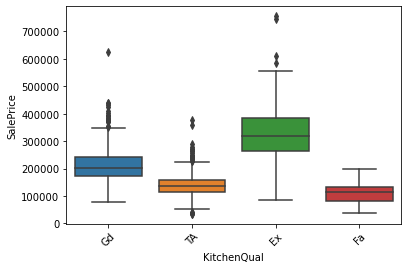

In [689]:
ax = sns.boxplot(data=train_qual_df, x='KitchenQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax


In [690]:
train_df.groupby('KitchenQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,100.0,328554.670000,120862.942573,86000.0,263474.0,316750.0,385312.5,755000.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
Gd,586.0,212116.023891,64020.176702,79000.0,172500.0,201400.0,242750.0,625000.0
TA,735.0,139962.511565,38896.280336,34900.0,116025.0,137000.0,160000.0,375000.0


**Higher levels of kitchen quality tend to yield higher-than-average or median sale prices, with many outliers to show in the Good and Excellent categories.**

In [691]:
corr_matrix = train_df.corr()
corr_matrix_sorted = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_sorted

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

**Let's create a bar chart of quantitative correlations.**

<AxesSubplot:>

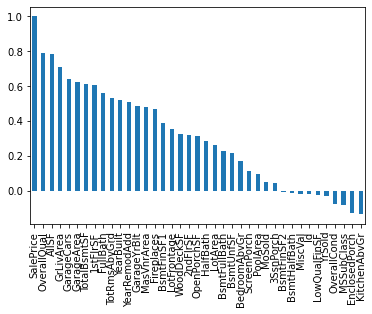

In [225]:
corr_matrix_sorted.plot(kind='bar')

### Predictor 1

**'Neighborhood' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

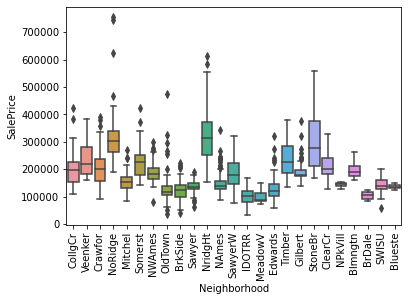

In [694]:
ax = sns.boxplot(data=train_df, x='Neighborhood', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [695]:
train_df.groupby('Neighborhood').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.00,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
BrkSide,58.0,124834.051724,40348.689270,39300.0,100500.00,124300.0,141175.00,223500.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.00,200250.0,242225.00,328000.0
CollgCr,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.00,424870.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.00,200624.0,239000.00,392500.0
Edwards,100.0,128219.700000,43208.616459,58500.0,101500.00,121750.0,145225.00,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.00,181000.0,197200.00,377500.0


**From the boxplot and chart above, it looks like 'NridgHt' is the most expensive neighborhood with the highest median.**

In [696]:
train_df.groupby(['Neighborhood']).SalePrice.median().sort_values(ascending=False)

Neighborhood
NridgHt    315000.0
NoRidge    301500.0
StoneBr    278000.0
Timber     228475.0
Somerst    225500.0
Veenker    218000.0
Crawfor    200624.0
ClearCr    200250.0
CollgCr    197200.0
Blmngtn    191000.0
NWAmes     182900.0
Gilbert    181000.0
SawyerW    179900.0
Mitchel    153500.0
NPkVill    146000.0
NAmes      140000.0
SWISU      139500.0
Blueste    137500.0
Sawyer     135000.0
BrkSide    124300.0
Edwards    121750.0
OldTown    119000.0
BrDale     106000.0
IDOTRR     103000.0
MeadowV     88000.0
Name: SalePrice, dtype: float64

### Predictor 2

**'HeatingQC' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

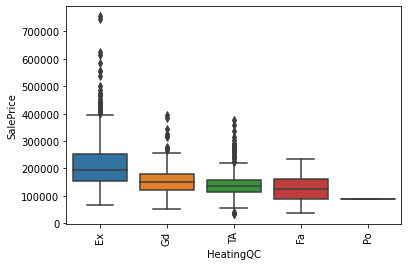

In [697]:
ax = sns.boxplot(data=train_df, x='HeatingQC', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

**The Majority of homes have Excellent, Good, and Average heating quality.**

In [698]:
train_df.groupby('HeatingQC').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
HeatingQC,,,,,,,,
Ex,741.0,214914.429150,87469.704503,66500.0,154900.0,194700.0,252000.0,755000.0
Fa,49.0,123919.489796,50306.618996,37900.0,87000.0,123500.0,161000.0,235000.0
Gd,241.0,156858.871369,52923.920003,52000.0,122500.0,152000.0,179200.0,395000.0
Po,1.0,87000.000000,NaN,87000.0,87000.0,87000.0,87000.0,87000.0
TA,428.0,142362.876168,47226.485663,34900.0,115000.0,135000.0,158925.0,375000.0


**Higher heating quality and condition seem to yield higher Sale Prices.**

In [701]:
train_df.groupby(['HeatingQC']).SalePrice.median().sort_values(ascending=False)

HeatingQC
Ex    194700.0
Gd    152000.0
TA    135000.0
Fa    123500.0
Po     87000.0
Name: SalePrice, dtype: float64

### Predictor 3

**'GrLivArea' has a high continuous quantitative correlation with 'SalePrice', let's create a marginal scatterplot and .describe() its relationship:**

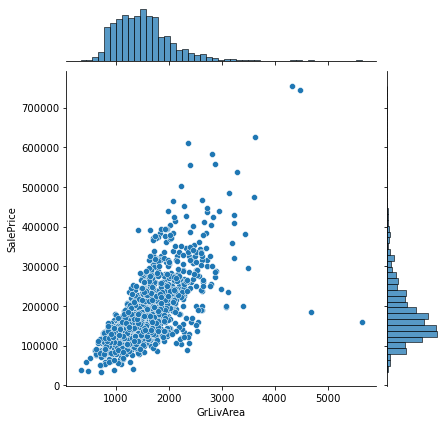

In [702]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train_df);

In [703]:
train_df.groupby('GrLivArea').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GrLivArea,,,,,,,,
334,1.0,39300.0,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
438,1.0,60000.0,NaN,60000.0,60000.0,60000.0,60000.0,60000.0
480,1.0,35311.0,NaN,35311.0,35311.0,35311.0,35311.0,35311.0
520,1.0,68500.0,NaN,68500.0,68500.0,68500.0,68500.0,68500.0
605,1.0,86000.0,NaN,86000.0,86000.0,86000.0,86000.0,86000.0
...,...,...,...,...,...,...,...,...
3627,1.0,625000.0,NaN,625000.0,625000.0,625000.0,625000.0,625000.0
4316,1.0,755000.0,NaN,755000.0,755000.0,755000.0,755000.0,755000.0
4476,1.0,745000.0,NaN,745000.0,745000.0,745000.0,745000.0,745000.0


**GrLivingArea seems to correlate well with SalePrice, including most outliers, with the exception of two larger homes with a Sale Price seem to be just over the median or average.**

### Predictor 4

**'OverallQual' has a high discrete quantitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

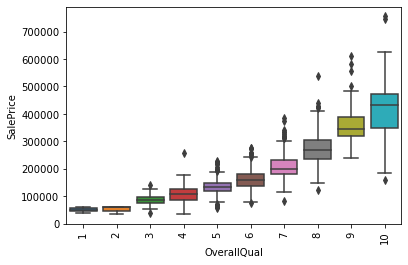

In [704]:
ax = sns.boxplot(data=train_df, x='OverallQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [705]:
train_df.groupby(['OverallQual']).SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
OverallQual,,,,,,,,
1,2.0,50150.000000,15344.217152,39300.0,44725.0,50150.0,55575.0,61000.0
2,3.0,51770.333333,14254.200796,35311.0,47655.5,60000.0,60000.0,60000.0
3,20.0,87473.750000,24688.567399,37900.0,75500.0,86250.0,97500.0,139600.0
4,116.0,108420.655172,29022.003886,34900.0,88000.0,108000.0,125500.0,256000.0
5,397.0,133523.347607,27107.330927,55993.0,118000.0,133000.0,147000.0,228950.0
6,374.0,161603.034759,36090.182933,76000.0,139125.0,160000.0,181000.0,277000.0
7,319.0,207716.423197,44466.259414,82500.0,179470.0,200141.0,230750.0,383970.0
8,168.0,274735.535714,63898.902253,122000.0,234557.5,269750.0,306250.0,538000.0
9,43.0,367513.023256,81278.174849,239000.0,318980.5,345000.0,389716.0,611657.0


In [706]:
train_df.groupby(['OverallQual']).SalePrice.median().sort_values(ascending=False)

OverallQual
10    432390.0
9     345000.0
8     269750.0
7     200141.0
6     160000.0
5     133000.0
4     108000.0
3      86250.0
2      60000.0
1      50150.0
Name: SalePrice, dtype: float64

**While homes with OverallQual to be 9 or 10 yield high home prices, they are also not very common compared to homes with lower overall quality rates as low as 4.**

### Predictor 5

**'SaleCondition' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

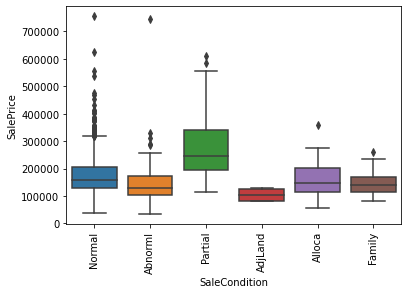

In [707]:
ax = sns.boxplot(data=train_df, x='SaleCondition', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [708]:
train_df.groupby('SaleCondition').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.0,745000.0
AdjLand,4.0,104125.000000,26135.464411,81000.0,81750.00,104000.0,126375.0,127500.0
Alloca,12.0,167377.416667,84460.527502,55993.0,116383.25,148145.0,202043.0,359100.0
Family,20.0,149600.000000,47820.002421,82500.0,115500.00,140500.0,170250.0,259000.0
Normal,1198.0,175202.219533,69713.636280,39300.0,130000.00,160000.0,205000.0,755000.0
Partial,125.0,272291.752000,103696.404119,113000.0,193879.00,244600.0,339750.0,611657.0


**Though 'Partial' has a couple of max outliers, the sale condition yields the highest median sale price. That said, most of the sale conditionss are overwhelmingly 'normal' compared to other sale condition types.**

### Predictor 6

**'KitchenQual' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

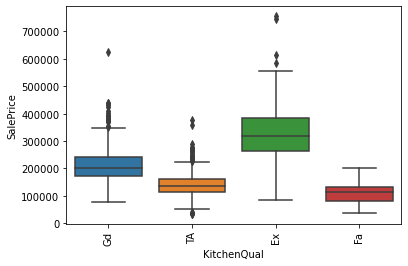

In [245]:
ax = sns.boxplot(data=train_df, x='KitchenQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [246]:
train_df.groupby('KitchenQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,100.0,328554.670000,120862.942573,86000.0,263474.0,316750.0,385312.5,755000.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
Gd,586.0,212116.023891,64020.176702,79000.0,172500.0,201400.0,242750.0,625000.0
TA,735.0,139962.511565,38896.280336,34900.0,116025.0,137000.0,160000.0,375000.0


### Predictor 7

**'ExterQual' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**




<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

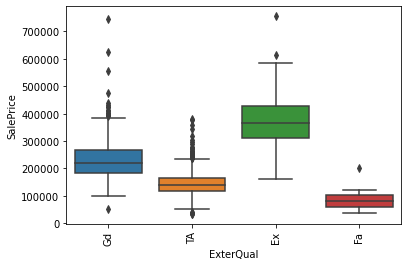

In [250]:
ax = sns.boxplot(data=train_df, x='ExterQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax


In [251]:
train_df.groupby('ExterQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
ExterQual,,,,,,,,
Ex,52.0,367360.961538,116401.264200,160000.0,311404.0,364606.5,428788.50,755000.0
Fa,14.0,87985.214286,39826.918794,39300.0,60250.0,82250.0,102000.00,200000.0
Gd,488.0,231633.510246,71188.873899,52000.0,185000.0,220000.0,265984.25,745000.0
TA,906.0,144341.313466,42471.815703,34900.0,118589.5,139450.0,165500.00,381000.0


### Predictor 8

**'BsmtQual' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**





<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

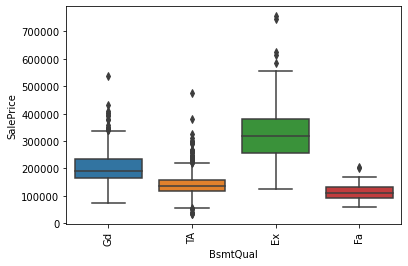

In [252]:
ax = sns.boxplot(data=train_df, x='BsmtQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax


In [253]:
train_df.groupby('BsmtQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtQual,,,,,,,,
Ex,121.0,327041.041322,113563.237392,123500.0,255500.0,318000.0,378500.0,755000.0
Fa,35.0,115692.028571,34469.667278,61000.0,91400.0,112000.0,133500.0,206900.0
Gd,618.0,202688.478964,58092.364284,75500.0,165100.0,192070.0,234000.0,538000.0
TA,649.0,140759.818182,43483.265311,34900.0,117000.0,135500.0,158000.0,475000.0


**All but 8 homes (8/1460 which is about 0.55%) in the training set do not have basements (TotalBsmtSF = 0), making basements in the Ames, Iwoa area a pretty common feature, in which we should include BsmtQual in the list of potential predcitors.**

- **Create at least one feature from the data set.**

### Feature 1

**Let's create new attribute 'TotalSF' which is TotalBsmtSF, 1stFlrSF, and 2ndFlrSF combined.**

In [261]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

### Feature 2

**Here is a scatterplot and marginal distribution of TotalSF in respect to SalePrice.**

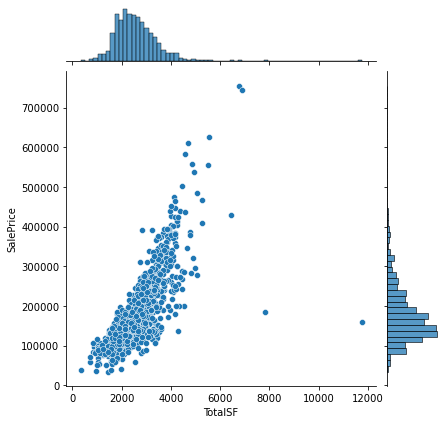

In [262]:
sns.jointplot(x="TotalSF", y="SalePrice", data=train_df)


**Let's create new attribute 'Age2022' which is 2022 (current year of this notebook) - YearBuilt.**

In [266]:
train_df['Age2022'] = 2022 - train_df['YearBuilt']

**Here is a scatterplot and marginal distribution of Age2022 in respect to SalePrice.**

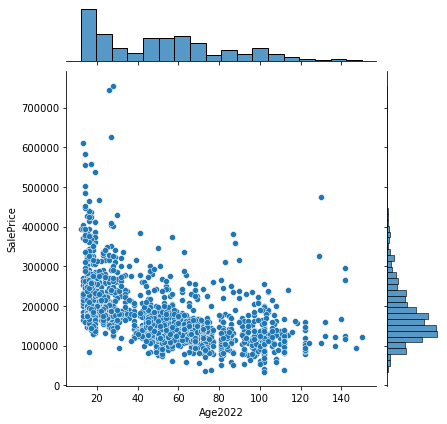

In [267]:
sns.jointplot(x="Age2022", y="SalePrice", data=train_df)

**TotalSF has a very high correlation value to SalePrice, even greater than that of GrLivArea.**

**Age2022 has a pretty negative corelation to Sale price, with newer homes yielding much higher sale prices. It seems that most older homes yield lower sale prices. It is the exact negative correlation to YearBuilt. With that in mind, when it comes to  feature selection, we should choose either YearBuilt or Age2022, but not use both in a model.**

In [268]:
corr_matrix = train_df.corr()
corr_matrix_sorted = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_sorted

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

<AxesSubplot:>

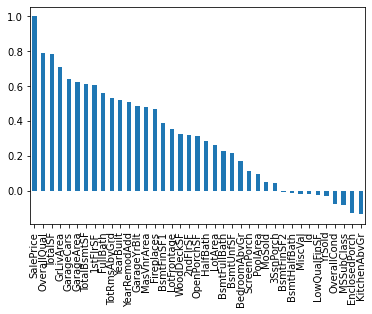

In [712]:
corr_matrix_sorted.plot(kind='bar')

In [713]:
train_df_test = train_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF', 'GrLivArea', 'SalePrice']].copy()
train_df_test

,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotalSF,GrLivArea,SalePrice
0,856,856,854,2566,1710,208500
1,1262,1262,0,2524,1262,181500
2,920,920,866,2706,1786,223500
3,756,961,756,2473,1717,140000
4,1145,1145,1053,3343,2198,250000
...,...,...,...,...,...,...
1455,953,953,694,2600,1647,175000
1456,1542,2073,0,3615,2073,210000
1457,1152,1188,1152,3492,2340,266500
1458,1078,1078,0,2156,1078,142125


**MinMax Scaling: comparing GrLivArea and OverallQual in respect to the dependent variable (SalePrice)**

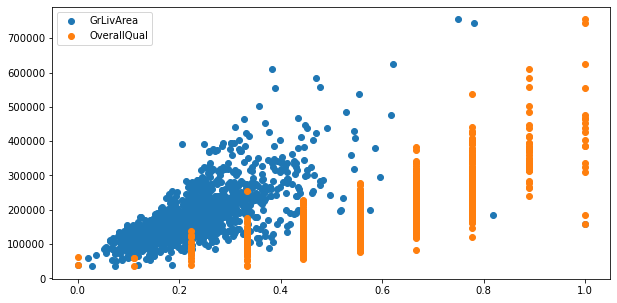

In [714]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:,0], y=sale_price)
ax.scatter(x=minmax_features[:,1], y=sale_price)

ax.legend(features)

**MainMax scaling logarithmic tranformation: helps with mitigating TotalSF's distribution more towards OverallQual's general distribution than its outliers.**

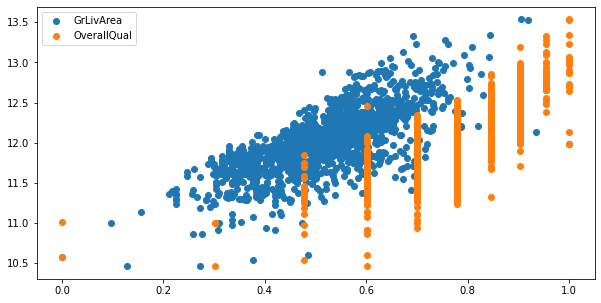

In [715]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]
features_df_log = np.log(features_df)

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df_log)
sale_price_log = np.log(train_df["SalePrice"])

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:,0], y=sale_price_log)
ax.scatter(x=minmax_features[:,1], y=sale_price_log)

ax.legend(features)

**Standard Scaling: comparing TotalSF and OverallQual in respect to the dependent variable (SalePrice)**

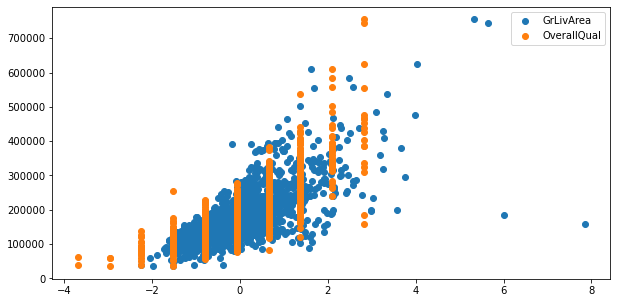

In [716]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(10, 5))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features[:,idx], y=sale_price)
ax.legend(features)


**Standard scaling logarithmic tranformation: doesn't have as much of a dramatic effect with the MinMax logarithmic transformation as the distributions were already more in line with each other before transformation.**

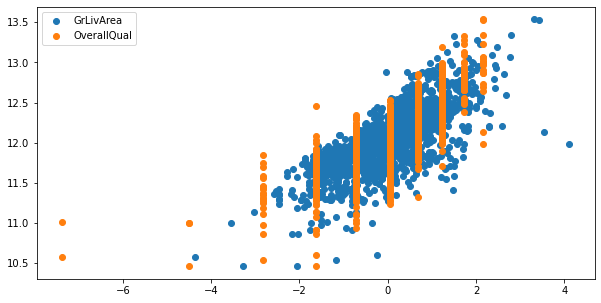

In [717]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]
features_df_log = np.log(features_df)

scaler = StandardScaler()
standardized_features_log = scaler.fit_transform(features_df_log)
sale_price_log = np.log(train_df["SalePrice"])

fig, ax = plt.subplots(figsize=(10, 5))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features_log[:,idx], y=sale_price_log)
ax.legend(features)


**Let's enumerate KitchenQual and compare it to OverallQual in respect to SalePrice.**

In [718]:
train_df.groupby('KitchenQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,100.0,328554.670000,120862.942573,86000.0,263474.0,316750.0,385312.5,755000.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
Gd,586.0,212116.023891,64020.176702,79000.0,172500.0,201400.0,242750.0,625000.0
TA,735.0,139962.511565,38896.280336,34900.0,116025.0,137000.0,160000.0,375000.0


In [719]:
def kitchenQualNumConverter(qual):
    if (qual == 'Ex'):
        return 4
    if (qual == 'Gd'):
        return 3
    if (qual == 'TA'):
        return 2
    if (qual =='Fa'):
        return 1
    if (qual == 'Po'):
        return 0
    else:
        return None

In [720]:
kitchenQualEnc = []

for idx, row in train_df.iterrows():
    kitchenQualEnc.append(kitchenQualNumConverter(row.KitchenQual))

train_df['KitchenQualEnc'] = kitchenQualEnc

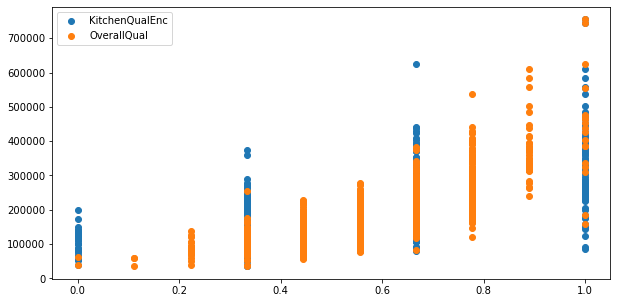

In [721]:
features = ['KitchenQualEnc','OverallQual']
features_df = train_df[features]

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:,0], y=sale_price)
ax.scatter(x=minmax_features[:,1], y=sale_price)

ax.legend(features)

**With MinMax Scaling, since there are no homes in the training data with 'Poor' Kitchen quality, the next-to-last category 'Fair' is placed at the end and is matched to OverallQual's 'very poor' rating. Let's try it with Standardized Scaling.**

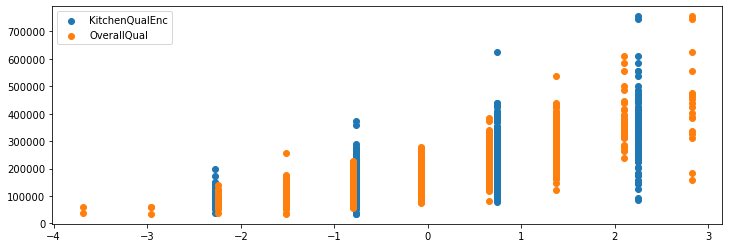

In [722]:
features = ['KitchenQualEnc','OverallQual']
features_df = train_df[features]

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(12, 4))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features[:,idx], y=sale_price)
ax.legend(features)

**Standard Scaling lines up both Overall Quality and Kitchen Quality 'Fair' ratings and gives matches both categories well in distribution.**

**Let's compare GrLivArea to to homes with garge space (square foot and number of cars) in respect to Sale Price.**

In [723]:
# filters homes in training set that have garage space
garage_df = train_df[train_df['GarageArea'] > 0]

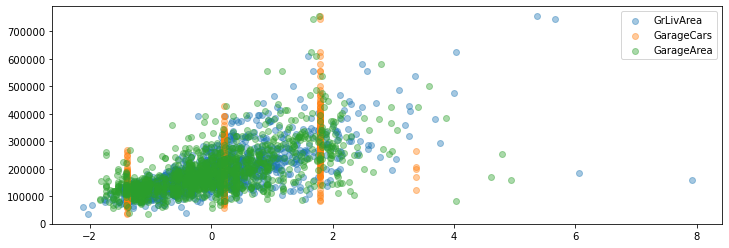

In [724]:
features = ['GrLivArea','GarageCars', 'GarageArea']
features_df = garage_df[features]

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features_df)
sale_price = garage_df["SalePrice"]

fig, ax = plt.subplots(figsize=(12, 4))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features[:,idx], y=sale_price, alpha=0.4)
ax.legend(features)

**it seems that pricier homes have 2 and 3 car garages. Ther are some exceptional homes that are not as pricey with 4-car garages, at most just under \\$300,000.**

- **Conduct your analysis using a cross-validation design.**

**Performing K-Fold cross-validation (K = 5 folds) on the quantitative features:**

In [499]:
# prepare the data:
# get a copy of the training dataframe
train_df_cv = train_df.copy()

# get the quantitative fields
train_df_cv_quant = train_df_cv[quant_cols].copy()

# get a copy of the dependent varaible results and drop it from the training set
y_cv = train_df_cv_quant['SalePrice']
train_df_cv_quant.drop(['SalePrice'], axis=1, inplace=True)

# data cleaning
train_df_cv_quant['LotFrontage'] = train_df_cv_quant['LotFrontage'].fillna(0)
train_df_cv_quant['MasVnrArea'] = train_df_cv_quant['MasVnrArea'].fillna(0)
train_df_cv_quant.drop(['GarageYrBlt'], axis=1, inplace=True)

In [500]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(LinearRegression(), train_df_cv_quant, y_cv, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.82764632 0.81891248 0.85438794 0.79093048 0.62688728 0.33369011
 0.82567243 0.88462508 0.85181987 0.8849538 ]
Accuracy: 0.77 (+/- 0.32)


In [501]:
x_train,x_val,y_train,y_val=train_test_split(train_df_cv_quant,y_cv,test_size=0.3,random_state=42)
linear_model = LinearRegression().fit(x_train,y_train)

In [502]:
linear_model.score(x_train,y_train)

0.8002170638254448

In [503]:
linear_model.score(x_val,y_val)

0.823047871928599

In [504]:
y_pred = linear_model.predict(x_val)

In [505]:
mean_squared_error(y_val, y_pred)

1234788540.8799767

In [506]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

In [507]:
ridge_model.score(x_train,y_train)

0.800215956714842

In [508]:
ridge_model.score(x_val,y_val)

0.8231109770943648

## MODELING

- **Build a minimum of two separate regression models using the training set.**

### Feature Selection

**Let us perform feature selection based on the high correlation to Sale Price (either >0.45 or < -0.45) and same of the qualitative predictors described earlier ("HeatingQC", "KitchenQual", "ExterQual", "Neighborhood").**

In [708]:
feat_sel_quant_cols = list(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"]>0.45) | (train_df.corr()["SalePrice"]<-0.45)].index)
feat_sel_qual_cols = ["HeatingQC", "KitchenQual", "ExterQual", "Neighborhood"]
feature_selection = feat_sel_quant_cols + feat_sel_qual_cols

In [709]:
feat_sel_quant_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Age2022',
 'TotalSF',
 'KitchenQualEnc',
 'ExterQualEnc']

**feature_selection includes both YearBuilt and Age2022, let us remove Age2022 as it has the negative correlation.**

In [710]:
feat_sel_quant_cols.remove('Age2022')

**Let's look at the Neighborhood counts:**

In [633]:
print(train_df["Neighborhood"].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


**Neighborhood boxplot from earlier:**

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

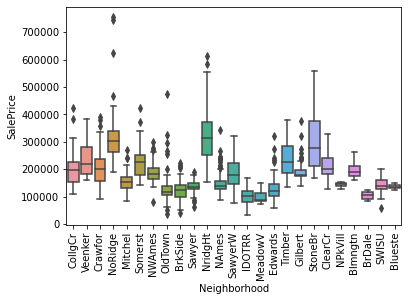

In [655]:
ax = sns.boxplot(data=train_df, x='Neighborhood', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [654]:
train_df.groupby(['Neighborhood']).SalePrice.median().sort_values(ascending=False)

Neighborhood
NridgHt    315000.0
NoRidge    301500.0
StoneBr    278000.0
Timber     228475.0
Somerst    225500.0
Veenker    218000.0
Crawfor    200624.0
ClearCr    200250.0
CollgCr    197200.0
Blmngtn    191000.0
NWAmes     182900.0
Gilbert    181000.0
SawyerW    179900.0
Mitchel    153500.0
NPkVill    146000.0
NAmes      140000.0
SWISU      139500.0
Blueste    137500.0
Sawyer     135000.0
BrkSide    124300.0
Edwards    121750.0
OldTown    119000.0
BrDale     106000.0
IDOTRR     103000.0
MeadowV     88000.0
Name: SalePrice, dtype: float64

**From the boxplot and the table above the top three neighborhoods in respect to the median Sale Price is 'NridgHt','NoRidge', 'StoneBr'. Let's make categories.**

In [648]:
# create categories for Neighborhoods
# Category 2 Neighborhoods are mid-tier in respect to the dependent variable (SalePrice)
neighborhoodCat2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
# Category 3 Neighborhoods are the top-three neighborhoods with the highest median in respect to the 
# dependent variable (SalePrice)
neighborhoodCat3 = ['NridgHt','NoRidge', 'StoneBr']

# ecnoder to enumerate the following categories:
# HeatingQC, KitchenQual, ExterQual
def neighborhoodEncoder(neighborhood):
    if (neighborhood in neighborhoodCat2):
        return 2
    elif (neighborhood in neighborhoodCat2):
        return 3
    else:
        return 1

In [649]:
neighborhoodEnc = []
for idx, row in train_df.iterrows():
    neighborhoodEnc.append(neighborhoodEncoder(row.Neighborhood))

train_df['NeighborhoodEnc'] = neighborhoodEnc

**Like kitchenQualNumConverter() above in the notebook, let's create a general quality encoder for HeatingQC, KitchenQual, and ExterQual.**

In [673]:
# ecnoder to enumerate the following categories:
# HeatingQC, KitchenQual, ExterQual
def qcEncoder(qual):
    if (qual == 'Ex'):
        return 4
    elif (qual == 'Gd'):
        return 3
    elif (qual == 'TA'):
        return 2
    elif (qual =='Fa'):
        return 1
    elif (qual == 'Po'):
        return 0
    else:
        return 0

In [674]:
kitchenQualEnc = []
heatingQCEnc = []
exterQualEnc = []

for idx, row in train_df.iterrows():
    kitchenQualEnc.append(qcEncoder(row.KitchenQual))
    heatingQCEnc.append(qcEncoder(row.HeatingQC))
    exterQualEnc.append(qcEncoder(row.ExterQual))

train_df['KitchenQualEnc'] = kitchenQualEnc
train_df['HeatingQCEnc'] = heatingQCEnc
train_df['ExterQualEnc'] = exterQualEnc


In [717]:
feat_sel_qual_enc_cols = ["HeatingQCEnc", "KitchenQualEnc", "ExterQualEnc", "NeighborhoodEnc"]

**This is our main feature selection.**

In [776]:
feature_selection = feat_sel_quant_cols + feat_sel_qual_enc_cols
feature_selection.remove("GarageYrBlt") # not all homes have garages and it is a numerical year so let's remove for now.
feature_selection.remove("SalePrice") # remove the dependent variable, can still get if from the original training set

In [777]:
feature_selection

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'TotalSF',
 'KitchenQualEnc',
 'ExterQualEnc',
 'HeatingQCEnc',
 'KitchenQualEnc',
 'ExterQualEnc',
 'NeighborhoodEnc']

In [778]:
# some basic house-keeping method
def basic_data_cleaning(cols):
    df = train_df[cols].copy()
    # not all homes have Masonry Veneers
    # some listings without it have MasVnrArea = null instead of 0, let's clean
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    return df

### Regression Model 1

**Let's build a linear regression model of the feature selections.**

In [779]:
feat_sel_quant_train_df = basic_data_cleaning(feature_selection)
y_cv = train_df['SalePrice']

In [780]:
feat_sel_quant_train_df

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,TotalSF,KitchenQualEnc,ExterQualEnc,HeatingQCEnc,KitchenQualEnc,ExterQualEnc,NeighborhoodEnc
0,7,2003,2003,196.0,856,856,1710,2,8,0,2,548,2566,3,3,4,3,3,2
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,2,460,2524,2,2,4,2,2,2
2,7,2001,2002,162.0,920,920,1786,2,6,1,2,608,2706,3,3,4,3,3,2
3,7,1915,1970,0.0,756,961,1717,1,7,1,3,642,2473,3,2,3,3,2,2
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,3,836,3343,3,3,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,2,460,2600,2,2,4,2,2,2
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,2,500,3615,2,2,2,2,2,2
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1,252,3492,3,4,4,3,4,2
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1,240,2156,3,2,3,3,2,1


**Perform K-Fold cross-validation:**

In [741]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(LinearRegression(), feat_sel_quant_train_df, y_cv, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.82493004 0.8196263  0.46016396 0.80628727 0.85573766]
Accuracy: 0.75 (+/- 0.29)


- **Evaluate goodness of fit metrics on the training and validation sets.**

**Linear Regression**

In [742]:
x_train,x_val,y_train,y_val=train_test_split(feat_sel_quant_train_df,y_cv,test_size=0.3,random_state=42)
linear_model = LinearRegression().fit(x_train,y_train)

In [743]:
linear_model.score(x_train,y_train)

0.774664768223595

In [785]:
linear_model.score(x_val,y_val)

0.8269999680581193

- **Evaluate the models’ assumptions.**

**Using a selection of fairly-correlated set of quantitative and qualitative features would make a fairly decent Sale Price predictor. With the linear model scoring just above 75% including KFold evaluation I feel it is a decent start given my introduction to Machine Learning so far in the course.**

<AxesSubplot:>

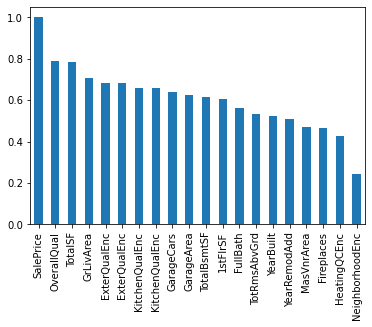

In [727]:
df_copy = feat_sel_quant_train_df.copy()
df_copy['SalePrice'] = y_cv
corr_matrix = df_copy.corr()
corr_matrix_sorted = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_sorted.plot(kind='bar')

In [728]:
olsmodel = sm.OLS(y_cv,feat_sel_quant_train_df)
ols_results = olsmodel.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2432.
Date:                Sun, 10 Apr 2022   Prob (F-statistic):                        0.00
Time:                        11:38:13   Log-Likelihood:                         -17401.
No. Observations:                1460   AIC:                                  3.484e+04
Df Residuals:                    1443   BIC:                                  3.492e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
OverallQual      1.444e+04   1267.614     11.394      0.000     1.2e+04    1.69e+04
YearBuilt          64.5585     45.526      1.418      0.156     -24.746     153.863
YearRemodAdd     -119.9356     44.898     -2.671      0.008    -208.007     -31.864
MasVnrArea         30.6932      6.206      4.946      0.000      18.520      42.866
TotalBsmtSF       -10.2891     20.821     -0.494      0.621     -51.131      30.553
1stFlrSF            9.1646      4.834      1.896      0.058      -0.318      18.647
GrLivArea          11.5941     20.342      0.570      0.569     -28.309      51.497
FullBath         -744.7888   2557.583     -0.291      0.771   -5761.767    4272.190
TotRmsAbvGrd      397.6391   1077.227      0.369      0.712   -1715.459    2510.737
Fireplaces       9361.1460   1774.167      5.276      0.000    5880.923    1.28e+04
GarageCars       9980.1410   2941.277      3.393      0.001    4210.504    1.57e+04
GarageArea         12.6281     10.018      1.261      0.208      -7.023      32.279
TotalSF            27.9516     20.495      1.364      0.173     -12.251      68.154
KitchenQualEnc   7829.6584   1131.135      6.922      0.000    5610.814       1e+04
ExterQualEnc     7238.6995   1416.557      5.110      0.000    4459.967       1e+04
HeatingQCEnc     3170.6991   1218.658      2.602      0.009     780.169    5561.230
KitchenQualEnc   7829.6584   1131.135      6.922      0.000    5610.814       1e+04
ExterQualEnc     7238.6995   1416.557      5.110      0.000    4459.967       1e+04
NeighborhoodEnc -2473.5886   2265.918     -1.092      0.275   -6918.435    1971.258
==============================================================================
Omnibus:                      500.603   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59382.717
Skew:                          -0.528   Prob(JB):                         0.00
Kurtosis:                      34.226   Cond. No.                     2.11e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Ridge Regression**

In [745]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(Ridge(), feat_sel_quant_train_df, y_cv, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.82988697 0.81545162 0.85730235 0.8025154  0.6363853  0.42356061
 0.81378418 0.80186337 0.83853845 0.8744355 ]
Accuracy: 0.77 (+/- 0.26)


In [746]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

In [747]:
ridge_model.score(x_train,y_train)

0.7746644023687563

In [748]:
ridge_model.score(x_val,y_val)

0.8270508055066617

### Regression Model 2

**Let's build a linear regression model of the feature selection quantitative models, standardized.**

In [781]:
df_std = feat_sel_quant_train_df.copy()

In [782]:
scaler = StandardScaler()
df_std[feature_selection] = scaler.fit_transform(df_std[feature_selection])

In [783]:
df_std.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,TotalSF,KitchenQualEnc,ExterQualEnc,HeatingQCEnc,KitchenQualEnc,ExterQualEnc,NeighborhoodEnc
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-7.680310e-17,1.032983e-15,4.518912e-15,-3.939010e-17,2.063038e-16,7.686013e-17,-1.446332e-16,2.770995e-16,4.387662e-17,2.701036e-16,2.585451e-17,-2.022735e-17,-2.424431e-16,-3.143604e-16,-3.604423e-16,9.516741e-17,-3.143604e-16,-3.604423e-16,-4.045470e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-3.688413e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-2.411167e+00,-2.144172e+00,-2.249120e+00,-2.841822e+00,-2.780469e+00,-9.512265e-01,-2.365440e+00,-2.212963e+00,-2.718479e+00,-2.278176e+00,-2.431510e+00,-3.279083e+00,-2.278176e+00,-2.431510e+00,-7.582698e-01
25%,-7.951515e-01,-5.719226e-01,-8.656586e-01,-5.707501e-01,-5.966855e-01,-7.261556e-01,-7.347485e-01,-1.026041e+00,-9.341298e-01,-9.512265e-01,-1.026858e+00,-6.479160e-01,-6.787512e-01,-7.710908e-01,-6.896039e-01,-1.193952e+00,-7.710908e-01,-6.896039e-01,-7.582698e-01
50%,-7.183611e-02,5.737148e-02,4.425864e-01,-5.707501e-01,-1.503334e-01,-1.956933e-01,-9.797004e-02,7.897405e-01,-3.186833e-01,6.004949e-01,3.117246e-01,3.284429e-02,-1.132760e-01,-7.710908e-01,-6.896039e-01,8.911794e-01,-7.710908e-01,-6.896039e-01,-7.582698e-01
75%,6.514792e-01,9.516316e-01,9.271216e-01,3.383686e-01,5.491227e-01,5.915905e-01,4.974036e-01,7.897405e-01,2.967633e-01,6.004949e-01,3.117246e-01,4.820057e-01,5.319380e-01,7.359943e-01,1.052302e+00,8.911794e-01,7.359943e-01,1.052302e+00,1.318792e+00
max,2.821425e+00,1.282839e+00,1.217843e+00,8.285201e+00,1.152095e+01,9.132681e+00,7.855574e+00,2.605522e+00,4.604889e+00,3.703938e+00,2.988889e+00,4.421526e+00,1.118162e+01,2.243080e+00,2.794208e+00,8.911794e-01,2.243080e+00,2.794208e+00,1.318792e+00


**Perform K-Fold cross-validation:**

In [784]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(LinearRegression(), df_std, y_cv, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.82493004 0.8196263  0.46016396 0.80630144 0.85573766]
Accuracy: 0.75 (+/- 0.29)


- **Evaluate goodness of fit metrics on the training and validation sets.**

In [765]:
x_train,x_val,y_train,y_val=train_test_split(df_std,y_cv,test_size=0.3,random_state=42)
linear_model = LinearRegression().fit(x_train,y_train)

In [766]:
linear_model.score(x_train,y_train)

0.774664768223595

In [767]:
linear_model.score(x_val,y_val)

0.8269999680581193

<AxesSubplot:>

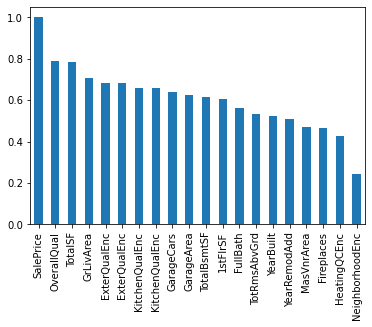

In [768]:
df_copy = df_std.copy()
df_copy['SalePrice'] = y_cv
corr_matrix = df_copy.corr()
corr_matrix_sorted = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_sorted.plot(kind='bar')

In [769]:
olsmodel = sm.OLS(y_cv,df_std)
ols_results = olsmodel.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.128
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              12.51
Date:                Sun, 10 Apr 2022   Prob (F-statistic):                    3.82e-33
Time:                        12:00:01   Log-Likelihood:                         -19774.
No. Observations:                1460   AIC:                                  3.958e+04
Df Residuals:                    1443   BIC:                                  3.967e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
OverallQual      1.877e+04   8987.553      2.089      0.037    1143.178    3.64e+04
YearBuilt        5639.2963   7892.238      0.715      0.475   -9842.191    2.11e+04
YearRemodAdd     3080.1345   7259.859      0.424      0.671   -1.12e+04    1.73e+04
MasVnrArea       5256.0777   5706.438      0.921      0.357   -5937.725    1.64e+04
TotalBsmtSF     -1965.7225   4.65e+04     -0.042      0.966   -9.32e+04    8.92e+04
1stFlrSF         3706.9037   9497.540      0.390      0.696   -1.49e+04    2.23e+04
GrLivArea        1.081e+04   5.45e+04      0.198      0.843   -9.61e+04    1.18e+05
FullBath        -2144.1058   7364.719     -0.291      0.771   -1.66e+04    1.23e+04
TotRmsAbvGrd     1383.1959   8927.591      0.155      0.877   -1.61e+04    1.89e+04
Fireplaces       6640.3342   5843.373      1.136      0.256   -4822.082    1.81e+04
GarageCars       6310.8537   1.12e+04      0.562      0.574   -1.57e+04    2.83e+04
GarageArea       2853.0071   1.09e+04      0.262      0.793   -1.85e+04    2.42e+04
TotalSF          1.748e+04   8.58e+04      0.204      0.839   -1.51e+05    1.86e+05
KitchenQualEnc   4236.0333   3932.696      1.077      0.282   -3478.380     1.2e+04
ExterQualEnc     3568.4551   4174.915      0.855      0.393   -4621.097    1.18e+04
HeatingQCEnc     1397.5497   6162.638      0.227      0.821   -1.07e+04    1.35e+04
KitchenQualEnc   4236.0333   3932.696      1.077      0.282   -3478.380     1.2e+04
ExterQualEnc     3568.4551   4174.915      0.855      0.393   -4621.097    1.18e+04
NeighborhoodEnc -2474.4242   5690.523     -0.435      0.664   -1.36e+04    8688.160
==============================================================================
Omnibus:                      529.414   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71021.822
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                      37.147   Cond. No.                     2.14e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.87e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Ridge Regression**

In [770]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(Ridge(), df_std, y_cv, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.8299404  0.81548116 0.85722647 0.80237472 0.63678554 0.42450314
 0.81456938 0.80187499 0.83854301 0.8743801 ]
Accuracy: 0.77 (+/- 0.26)


In [771]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

In [772]:
ridge_model.score(x_train,y_train)

0.7746619803175252

In [773]:
ridge_model.score(x_val,y_val)

0.8271035657230027

### SUBMISSION

In [749]:
# get linear regression model only using a selection of qualitative features
feat_sel_quant_train_df, y_cv = basic_data_cleaning(feature_selection)

In [750]:
# create training set
x_train,x_val,y_train,y_val=train_test_split(feat_sel_quant_train_df,y_cv,test_size=0.3,random_state=42)

In [751]:
# create linear regression model
linear_model = LinearRegression().fit(x_train,y_train)
linear_model.score(x_train, y_train)

0.774664768223595

In [752]:
# create ridge regression model
ridge_model = Ridge().fit(x_train, y_train)
ridge_model.score(x_train, y_train)


0.7746644023687563

In [753]:
test_features = feat_sel_quant_train_df.columns.values

In [755]:
# transform the test data based on what was done to the training data
test_df_copy = test_df.copy()
# basic data cleaning
test_df_copy['MasVnrArea'] = test_df_copy['MasVnrArea'].fillna(0)
test_df_copy['TotalBsmtSF'] = test_df_copy['TotalBsmtSF'].fillna(0)
test_df_copy['GarageCars'] = test_df_copy['GarageCars'].fillna(0)
test_df_copy['GarageArea'] = test_df_copy['GarageArea'].fillna(0)
# creating feature: TotalSF
test_df_copy['TotalSF'] = test_df_copy['TotalBsmtSF'] + test_df_copy['1stFlrSF'] + test_df_copy['2ndFlrSF']

# encoding a small selection of highly-correlated categorial features: Neighborhood, KitchenQual, HeatingQC, ExterQual
neighborhoodEnc = []
kitchenQualEnc = []
heatingQCEnc = []
exterQualEnc = []
for idx, row in test_df_copy.iterrows():
    neighborhoodEnc.append(neighborhoodEncoder(row.Neighborhood))
    kitchenQualEnc.append(qcEncoder(row.KitchenQual))
    heatingQCEnc.append(qcEncoder(row.HeatingQC))
    exterQualEnc.append(qcEncoder(row.ExterQual))

test_df_copy['NeighborhoodEnc'] = neighborhoodEnc
test_df_copy['KitchenQualEnc'] = kitchenQualEnc
test_df_copy['HeatingQCEnc'] = heatingQCEnc
test_df_copy['ExterQualEnc'] = exterQualEnc

test_quant_df=test_df_copy[test_features]


In [756]:
# ready the test data for submission
x = test_quant_df

In [757]:
# get the submission results using given regression model
y = linear_model.predict(x)
#y = ridge_model.predict(x)

In [758]:
# create submission file
submission = pd.DataFrame({"Id": test_df['Id'],"SalePrice": y})
submission.to_csv('submission.csv', index=False)

- **Submit predictions for the unseen test set available on Kaggle.com.**

<img src="Screenshot-2022-04-09-210330.jpg">

- **Provide your Kaggle user name and a screen snapshot of your Kaggle scores.**

**User Name:**

https://www.kaggle.com/reedballesterosnu

<img src="Screenshot-2022-04-09-212243.jpg">


**Kaggle Score:**

<img src="Screenshot-2022-04-10-114639.jpg">


## CONCLUSION

- **Discuss what your models tell you in layman’s terms**

**At first I attempted to use only a selction of fairly-correlated quantitative features for my model and got a relatively low score at Kaggle. It wasn't until I was able to encode a few highly-correlated categories based on my observations with box plots that my score dramatically increased. That being said, there is still much more room for improvement over time, but for generating some basic models to submit is a good start and an even better learning experience in understanding Machine Learning.**

**The Linear Regression and Ridge Regression methods yield almost the same results. Having the dataset scaled did not yield any major changes as well.**


### Management/Research Question

**In layman’s terms, what is the management/research question of interest, and why would anyone care?**


**Given the Ames, Iowa home Prices dataset, we want to find which features play a major factor in predicting the price of a home. Home owners might focus on these particular features in order to improve the value of their homes in the area. Realtors would look more at potential sales and revenue of certain homes that have a high rating of these features. Propsective buyers can use this information to understand what kind of home they can afford in the area with these kinds of features.**